In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import helper as hp
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
df_allianz = hp.produce_brut("allianz-1-to-94")

In [3]:
df_allianz

,num_page,text,width,height,area,chars,char_size,pos_x,pos_y,aspect,layout,x0,x1,y0,y1,assureur
0,1,Allianz,0.250420,0.030879,0.007733,9,0.000859,0.180672,0.112827,8.109758,h,0.055462,0.305882,0.097387,0.098575,allianz-1-to-94
1,1,ALLIANZ VIE,0.117647,0.010689,0.001258,12,0.000105,0.114286,0.215558,11.006553,h,0.055462,0.173109,0.210214,0.210214,allianz-1-to-94
2,1,Rapport sur la solvabilité,0.663866,0.041568,0.027595,27,0.001022,0.392437,0.271378,15.970699,h,0.060504,0.724370,0.256532,0.250594,allianz-1-to-94
3,1,Exercice 2022,0.121008,0.010689,0.001293,14,0.000092,0.115966,0.437648,11.320995,h,0.055462,0.176471,0.432304,0.432304,allianz-1-to-94
4,1,et la situation financière,0.638655,0.033254,0.021238,27,0.000787,0.613445,0.321853,19.205268,h,0.294118,0.932773,0.306413,0.305226,allianz-1-to-94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4166,94,Entreprise régie par le Code des assurances So...,0.322689,0.038005,0.012264,107,0.000115,0.243697,0.874109,8.490757,h,0.082353,0.405042,0.856294,0.855107,allianz-1-to-94
4167,94,1 cours Michelet - CS 30051 92076 Paris La Déf...,0.196639,0.022565,0.004437,57,0.000078,0.180672,0.906770,8.714202,h,0.082353,0.278992,0.895487,0.895487,allianz-1-to-94
4168,94,340 234 962 R.C.S. Nanterre,0.183193,0.007126,0.001305,28,0.000047,0.173950,0.927553,25.708092,h,0.082353,0.265546,0.923991,0.923991,allianz-1-to-94
4169,94,,0.023529,0.014252,0.000335,1,0.000335,0.850420,0.923991,1.650981,h,0.838655,0.862185,0.916865,0.916865,allianz-1-to-94


In [4]:
df_allianz.dtypes

num_page       int64
text          object
width        float64
height       float64
area         float64
chars          int64
char_size    float64
pos_x        float64
pos_y        float64
aspect       float64
layout        object
x0           float64
x1           float64
y0           float64
y1           float64
assureur      object
dtype: object

In [5]:
df_allianz.isna().sum()

num_page     0
text         0
width        0
height       0
area         0
chars        0
char_size    0
pos_x        0
pos_y        0
aspect       0
layout       0
x0           0
x1           0
y0           0
y1           0
assureur     0
dtype: int64

In [6]:
df_allianz.describe()

,num_page,width,height,area,chars,char_size,pos_x,pos_y,aspect,x0,x1,y0,y1
count,4171.000000,4171.000000,4171.000000,4171.000000,4171.000000,4171.000000,4171.000000,4171.000000,4171.000000,4171.000000,4171.000000,4171.000000,4171.000000
mean,52.892352,0.223117,0.014893,0.005399,63.631743,0.000089,0.472044,0.435272,15.780041,0.360514,0.583436,0.429148,0.428005
std,27.340199,0.272119,0.018313,0.011063,114.955367,0.000963,0.234191,0.239202,16.020362,0.285952,0.254841,0.238634,0.239527
min,1.000000,0.003361,0.001188,0.000004,1.000000,0.000002,0.073950,0.054038,0.045797,0.035294,0.073950,0.048694,0.049881
25%,28.000000,0.035294,0.005938,0.000228,7.000000,0.000031,0.273950,0.242280,5.188758,0.070588,0.389916,0.239905,0.234561
50%,57.000000,0.075630,0.008314,0.000709,17.000000,0.000048,0.476471,0.400238,9.198292,0.300840,0.593277,0.395487,0.395487
75%,78.000000,0.334454,0.015439,0.003928,62.500000,0.000070,0.665126,0.603919,22.002929,0.613445,0.847059,0.596199,0.594418
max,94.000000,0.836975,0.366983,0.131410,1427.000000,0.034877,0.926050,0.969121,113.917021,0.917647,0.932773,0.964371,0.964371


<Axes: >

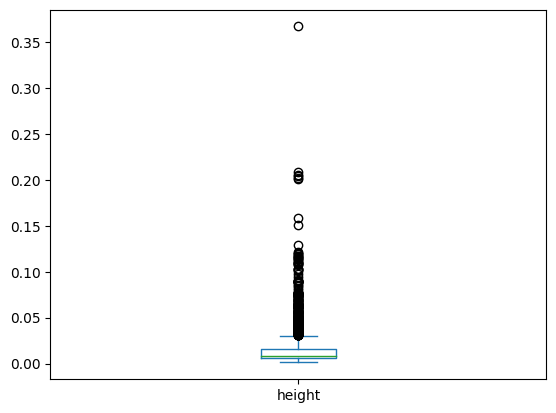

In [7]:
df_allianz["height"].plot(kind="box")

In [8]:
df_allianz.columns

Index(['num_page', 'text', 'width', 'height', 'area', 'chars', 'char_size',
       'pos_x', 'pos_y', 'aspect', 'layout', 'x0', 'x1', 'y0', 'y1',
       'assureur'],
      dtype='object')

In [9]:
def add_is_footer_inf(df:pd.DataFrame):
    """Create a column that check if text is at the bottom of the page
    """
    quantile = df["pos_y"].quantile(0.95)
    df["is_footer_inf"] = df["pos_y"]>quantile

In [10]:
add_is_footer_inf(df_allianz)

In [11]:
df_allianz.loc[df_allianz["is_footer_inf"]]

,num_page,text,width,height,area,chars,char_size,pos_x,pos_y,aspect,layout,x0,x1,y0,y1,assureur,is_footer_inf
46,3,Allianz Vie Rapport sur la Solvabilité et la ...,0.408403,0.009501,0.003880,67,0.000058,0.274790,0.969121,42.984624,h,0.070588,0.478992,0.964371,0.964371,allianz-1-to-94,True
89,3,3,0.020168,0.008314,0.000168,3,0.000056,0.895798,0.968527,2.425926,h,0.885714,0.905882,0.964371,0.964371,allianz-1-to-94,True
100,6,61,0.018487,0.009501,0.000176,3,0.000059,0.078151,0.969121,1.945806,h,0.068908,0.087395,0.964371,0.964371,allianz-1-to-94,True
125,6,Allianz Vie Rapport sur la Solvabilité et la ...,0.411765,0.009501,0.003912,67,0.000058,0.698319,0.969121,43.338409,h,0.492437,0.904202,0.964371,0.964371,allianz-1-to-94,True
142,7,Ratio de solvabilité MCR ( 2 ) / ( 4 ),0.211765,0.009501,0.002012,40,0.000050,0.329412,0.897862,22.288324,h,0.223529,0.435294,0.893112,0.894299,allianz-1-to-94,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4153,93,93,0.025210,0.009501,0.000240,4,0.000060,0.081513,0.969121,2.653371,h,0.068908,0.094118,0.964371,0.964371,allianz-1-to-94,True
4163,93,Allianz Vie Rapport sur la Solvabilité et la ...,0.411765,0.009501,0.003912,67,0.000058,0.698319,0.969121,43.338409,h,0.492437,0.904202,0.964371,0.964371,allianz-1-to-94,True
4167,94,1 cours Michelet - CS 30051 92076 Paris La Déf...,0.196639,0.022565,0.004437,57,0.000078,0.180672,0.906770,8.714202,h,0.082353,0.278992,0.895487,0.895487,allianz-1-to-94,True
4168,94,340 234 962 R.C.S. Nanterre,0.183193,0.007126,0.001305,28,0.000047,0.173950,0.927553,25.708092,h,0.082353,0.265546,0.923991,0.923991,allianz-1-to-94,True


In [12]:
def add_is_header_inf(df:pd.DataFrame):
    """Create a column that check if text is at the top of the page
    """
    quantile = df["pos_y"].quantile(0.04)
    df["is_header_inf"] = df["pos_y"]<=quantile

In [13]:
add_is_header_inf(df_allianz)

In [14]:
df_allianz.loc[df_allianz["is_header_inf"]]

,num_page,text,width,height,area,chars,char_size,pos_x,pos_y,aspect,layout,x0,x1,y0,y1,assureur,is_footer_inf,is_header_inf
91,6,Synthèse,0.057143,0.008314,0.000475,9,0.000053,0.099160,0.057601,6.873469,h,0.070588,0.127731,0.053444,0.053444,allianz-1-to-94,False,True
118,6,Exercice 2022,0.089076,0.007126,0.000635,14,0.000045,0.859664,0.055819,12.500279,h,0.815126,0.904202,0.052257,0.052257,allianz-1-to-94,False,True
126,7,Exercice 2022,0.089076,0.007126,0.000635,14,0.000045,0.115126,0.055819,12.500278,h,0.070588,0.159664,0.052257,0.052257,allianz-1-to-94,False,True
160,7,Synthèse,0.057143,0.009501,0.000543,9,0.000060,0.875630,0.057007,6.014287,h,0.847059,0.904202,0.052257,0.052257,allianz-1-to-94,False,True
183,10,Activité et résultats,0.122689,0.007126,0.000874,22,0.000040,0.131933,0.054632,17.217363,h,0.070588,0.193277,0.051069,0.051069,allianz-1-to-94,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4007,90,Exercice 2022,0.089076,0.007126,0.000635,14,0.000045,0.859664,0.055819,12.500279,h,0.815126,0.904202,0.052257,0.052257,allianz-1-to-94,False,True
4033,91,Exercice 2022,0.089076,0.007126,0.000635,14,0.000045,0.115126,0.055819,12.500278,h,0.070588,0.159664,0.052257,0.052257,allianz-1-to-94,False,True
4089,91,Annexes,0.057143,0.007126,0.000407,8,0.000051,0.875630,0.055819,8.019048,h,0.847059,0.904202,0.052257,0.052257,allianz-1-to-94,False,True
4110,92,Annexes,0.057143,0.007126,0.000407,8,0.000051,0.097479,0.055819,8.019047,h,0.068908,0.126050,0.052257,0.052257,allianz-1-to-94,False,True


In [15]:
df_axa = hp.produce_brut("axa-output-1-to-71")

In [16]:
add_is_header_inf(df_axa)
add_is_footer_inf(df_axa)

In [17]:
df_axa[df_axa["is_header_inf"]]

,num_page,text,width,height,area,chars,char_size,pos_x,pos_y,aspect,layout,x0,x1,y0,y1,assureur,is_header_inf,is_footer_inf
7,2,AXA SA Rapport sur la Solvabilité et la Situa...,0.455462,0.010702,0.004874,67,0.000073,0.498319,0.049346,42.560406,h,0.270588,0.726050,0.045184,0.043995,axa-output-1-to-71,True,False
8,2,SYNTHESE,0.078992,0.008323,0.000657,9,0.000073,0.157143,0.090963,9.490276,h,0.117647,0.196639,0.086801,0.086801,axa-output-1-to-71,True,False
76,2,7,0.010084,0.007134,0.000072,2,0.000036,0.873950,0.090369,1.413440,h,0.868908,0.878992,0.086801,0.086801,axa-output-1-to-71,True,False
89,3,AXA SA Rapport sur la Solvabilité et la Situa...,0.455462,0.010702,0.004874,67,0.000073,0.498319,0.049346,42.560406,h,0.270588,0.726050,0.043995,0.043995,axa-output-1-to-71,True,False
90,3,/ Exposition au risque de marché .,0.233613,0.011891,0.002778,35,0.000079,0.251261,0.091558,19.646891,h,0.134454,0.368067,0.086801,0.085612,axa-output-1-to-71,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1818,67,AXA SA Rapport sur la Solvabilité et la Situa...,0.455462,0.011891,0.005416,67,0.000081,0.498319,0.048751,38.304365,h,0.270588,0.726050,0.043995,0.042806,axa-output-1-to-71,True,False
1852,68,AXA SA Rapport sur la Solvabilité et la Situa...,0.455462,0.011891,0.005416,67,0.000081,0.498319,0.048751,38.304365,h,0.270588,0.726050,0.043995,0.042806,axa-output-1-to-71,True,False
1880,69,AXA SA Rapport sur la Solvabilité et la Situa...,0.455462,0.011891,0.005416,67,0.000081,0.498319,0.048751,38.304365,h,0.270588,0.726050,0.043995,0.042806,axa-output-1-to-71,True,False
1902,70,AXA SA Rapport sur la Solvabilité et la Situa...,0.455462,0.011891,0.005416,67,0.000081,0.498319,0.048751,38.304365,h,0.270588,0.726050,0.043995,0.042806,axa-output-1-to-71,True,False


In [18]:
df_axa[df_axa["is_footer_inf"]]

,num_page,text,width,height,area,chars,char_size,pos_x,pos_y,aspect,layout,x0,x1,y0,y1,assureur,is_header_inf,is_footer_inf
75,2,2,0.011765,0.008323,0.000098,2,0.000049,0.498319,0.939952,1.413443,h,0.492437,0.504202,0.935791,0.935791,axa-output-1-to-71,False,True
83,2,AXA SA SFCR 2022,0.132773,0.007134,0.000947,18,0.000053,0.498319,0.973841,18.610271,h,0.431933,0.564706,0.970274,0.970274,axa-output-1-to-71,False,True
129,3,AXA SA SFCR 2022,0.132773,0.007134,0.000947,18,0.000053,0.498319,0.973841,18.610271,h,0.431933,0.564706,0.970274,0.970274,axa-output-1-to-71,False,True
189,4,AXA SA SFCR 2022,0.132773,0.007134,0.000947,18,0.000053,0.498319,0.973841,18.610271,h,0.431933,0.564706,0.970274,0.970274,axa-output-1-to-71,False,True
218,5,AXA SA SFCR 2022,0.132773,0.007134,0.000947,18,0.000053,0.498319,0.973841,18.610271,h,0.431933,0.564706,0.970274,0.970274,axa-output-1-to-71,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1844,67,AXA SA SFCR 2022,0.132773,0.007134,0.000947,18,0.000053,0.498319,0.973841,18.610271,h,0.431933,0.564706,0.970274,0.970274,axa-output-1-to-71,False,True
1879,68,AXA SA SFCR 2022,0.132773,0.007134,0.000947,18,0.000053,0.498319,0.973841,18.610271,h,0.431933,0.564706,0.970274,0.970274,axa-output-1-to-71,False,True
1893,69,AXA SA SFCR 2022,0.132773,0.007134,0.000947,18,0.000053,0.498319,0.973841,18.610271,h,0.431933,0.564706,0.970274,0.970274,axa-output-1-to-71,False,True
1910,70,AXA SA SFCR 2022,0.132773,0.007134,0.000947,18,0.000053,0.498319,0.973841,18.610271,h,0.431933,0.564706,0.970274,0.970274,axa-output-1-to-71,False,True


<Axes: ylabel='area'>

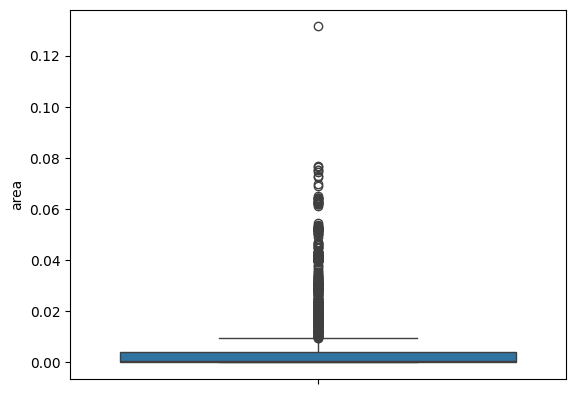

In [19]:
sns.boxplot(data=df_allianz,y="area")

In [20]:
def count_digits(input_string):
    count = 0
    for char in input_string:
        if char.isdigit():
            count += 1
    return count


def add_is_chart_content(df:pd.DataFrame):
    df["nb_digts"] = df["text"].apply(count_digits)
    df["nb_digts/nb_chars"] = df["nb_digts"]/df["chars"]
    df["is_chart_content"] = (df["nb_digts/nb_chars"]>df["nb_digts/nb_chars"].quantile(0.6))&(df["chars"]>df["chars"].quantile(0.5))

In [21]:
add_is_chart_content(df_allianz)
df_allianz[df_allianz["is_chart_content"]]

,num_page,text,width,height,area,chars,char_size,pos_x,pos_y,aspect,...,x0,x1,y0,y1,assureur,is_footer_inf,is_header_inf,nb_digts,nb_digts/nb_chars,is_chart_content
158,7,2 808 449 911 109 144 %,0.058823,0.036817,0.002166,24,0.000090,0.542017,0.865202,1.597724,...,0.512605,0.571429,0.846793,0.846793,allianz-1-to-94,False,False,16,0.666667,True
162,7,5 094 013 5 016 870,0.060504,0.020190,0.001222,20,0.000061,0.643698,0.828385,2.996735,...,0.613445,0.673950,0.818290,0.818290,allianz-1-to-94,False,False,14,0.700000,True
168,7,Variation -1 063 387 -1 354 368 -376 191,0.063866,0.049881,0.003186,41,0.000078,0.729412,0.827791,1.280352,...,0.697479,0.761345,0.802850,0.802850,allianz-1-to-94,False,False,20,0.487805,True
170,7,31/12/2022 62 922 466,0.080672,0.021378,0.001725,22,0.000078,0.828571,0.353919,3.773670,...,0.788235,0.868908,0.343230,0.343230,allianz-1-to-94,False,False,16,0.727273,True
178,7,58 771 840 55 582 463 54 962 527,0.067227,0.035629,0.002395,33,0.000073,0.821849,0.451306,1.886835,...,0.788235,0.855462,0.433492,0.433492,allianz-1-to-94,False,False,24,0.727273,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4146,93,Figure 1 Structure de l'actionnariat au 31 dé...,0.378151,0.008314,0.003144,58,0.000054,0.259664,0.120546,45.486190,...,0.070588,0.448740,0.116390,0.116390,allianz-1-to-94,False,False,7,0.120690,True
4151,93,Figure 6 - Test de sensibilité sur les risques...,0.373109,0.020190,0.007533,88,0.000086,0.257143,0.269002,18.479903,...,0.070588,0.443697,0.258907,0.258907,allianz-1-to-94,False,False,11,0.125000,True
4154,93,Figure 7 - Passage des fonds propres Solvabili...,0.361344,0.021378,0.007725,92,0.000084,0.698319,0.127078,16.902887,...,0.517647,0.878992,0.116390,0.116390,allianz-1-to-94,False,False,13,0.141304,True
4167,94,1 cours Michelet - CS 30051 92076 Paris La Déf...,0.196639,0.022565,0.004437,57,0.000078,0.180672,0.906770,8.714202,...,0.082353,0.278992,0.895487,0.895487,allianz-1-to-94,True,False,11,0.192982,True


In [22]:
def add_is_title(df:pd.DataFrame):
    df["is_title"] = df["char_size"]>df["char_size"].quantile(0.85)

In [23]:
add_is_title(df_allianz)
df_allianz[df_allianz["is_title"]]

,num_page,text,width,height,area,chars,char_size,pos_x,pos_y,aspect,...,x1,y0,y1,assureur,is_footer_inf,is_header_inf,nb_digts,nb_digts/nb_chars,is_chart_content,is_title
0,1,Allianz,0.250420,0.030879,0.007733,9,0.000859,0.180672,0.112827,8.109758,...,0.305882,0.097387,0.098575,allianz-1-to-94,False,False,0,0.000000,False,True
1,1,ALLIANZ VIE,0.117647,0.010689,0.001258,12,0.000105,0.114286,0.215558,11.006553,...,0.173109,0.210214,0.210214,allianz-1-to-94,False,False,0,0.000000,False,True
2,1,Rapport sur la solvabilité,0.663866,0.041568,0.027595,27,0.001022,0.392437,0.271378,15.970699,...,0.724370,0.256532,0.250594,allianz-1-to-94,False,False,0,0.000000,False,True
3,1,Exercice 2022,0.121008,0.010689,0.001293,14,0.000092,0.115966,0.437648,11.320995,...,0.176471,0.432304,0.432304,allianz-1-to-94,False,False,4,0.285714,False,True
4,1,et la situation financière,0.638655,0.033254,0.021238,27,0.000787,0.613445,0.321853,19.205268,...,0.932773,0.306413,0.305226,allianz-1-to-94,False,False,0,0.000000,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4158,93,Figure 10 Structure des risques en Modèle Int...,0.331092,0.021378,0.007078,61,0.000116,0.683193,0.228028,15.487768,...,0.848739,0.218527,0.217340,allianz-1-to-94,False,False,2,0.032787,False,True
4162,93,Figure 11 Structure des risques en Formule St...,0.384874,0.029691,0.011427,117,0.000098,0.710084,0.266627,12.962549,...,0.902521,0.251781,0.251781,allianz-1-to-94,False,False,8,0.068376,False,True
4164,94,Allianz,0.119328,0.021378,0.002551,8,0.000319,0.145378,0.819477,5.581879,...,0.205042,0.808789,0.811164,allianz-1-to-94,False,False,0,0.000000,False,True
4166,94,Entreprise régie par le Code des assurances So...,0.322689,0.038005,0.012264,107,0.000115,0.243697,0.874109,8.490757,...,0.405042,0.856294,0.855107,allianz-1-to-94,False,False,9,0.084112,False,True


In [24]:
# Recap of all we did into a single function
def add_label(df:pd.DataFrame):
    add_is_header_inf(df)
    add_is_footer_inf(df)
    add_is_chart_content(df)
    add_is_title(df)
    df.loc[(df["is_header_inf"]==True)|(df["is_footer_inf"]==True)|(df["is_chart_content"]==True),"Label"] = "Inutile"
    df.loc[df["is_title"]==True,"Label"] = "Titre"
    df["Label"].fillna("Paragraphe",axis=0,inplace=True)

In [25]:
add_label(df_allianz)
df_allianz

,num_page,text,width,height,area,chars,char_size,pos_x,pos_y,aspect,...,y0,y1,assureur,is_footer_inf,is_header_inf,nb_digts,nb_digts/nb_chars,is_chart_content,is_title,Label
0,1,Allianz,0.250420,0.030879,0.007733,9,0.000859,0.180672,0.112827,8.109758,...,0.097387,0.098575,allianz-1-to-94,False,False,0,0.000000,False,True,Titre
1,1,ALLIANZ VIE,0.117647,0.010689,0.001258,12,0.000105,0.114286,0.215558,11.006553,...,0.210214,0.210214,allianz-1-to-94,False,False,0,0.000000,False,True,Titre
2,1,Rapport sur la solvabilité,0.663866,0.041568,0.027595,27,0.001022,0.392437,0.271378,15.970699,...,0.256532,0.250594,allianz-1-to-94,False,False,0,0.000000,False,True,Titre
3,1,Exercice 2022,0.121008,0.010689,0.001293,14,0.000092,0.115966,0.437648,11.320995,...,0.432304,0.432304,allianz-1-to-94,False,False,4,0.285714,False,True,Titre
4,1,et la situation financière,0.638655,0.033254,0.021238,27,0.000787,0.613445,0.321853,19.205268,...,0.306413,0.305226,allianz-1-to-94,False,False,0,0.000000,False,True,Titre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4166,94,Entreprise régie par le Code des assurances So...,0.322689,0.038005,0.012264,107,0.000115,0.243697,0.874109,8.490757,...,0.856294,0.855107,allianz-1-to-94,False,False,9,0.084112,False,True,Titre
4167,94,1 cours Michelet - CS 30051 92076 Paris La Déf...,0.196639,0.022565,0.004437,57,0.000078,0.180672,0.906770,8.714202,...,0.895487,0.895487,allianz-1-to-94,True,False,11,0.192982,True,False,Inutile
4168,94,340 234 962 R.C.S. Nanterre,0.183193,0.007126,0.001305,28,0.000047,0.173950,0.927553,25.708092,...,0.923991,0.923991,allianz-1-to-94,True,False,9,0.321429,True,False,Inutile
4169,94,,0.023529,0.014252,0.000335,1,0.000335,0.850420,0.923991,1.650981,...,0.916865,0.916865,allianz-1-to-94,True,False,0,0.000000,False,True,Titre


In [26]:
add_label(df_axa)
df_axa

,num_page,text,width,height,area,chars,char_size,pos_x,pos_y,aspect,...,y0,y1,assureur,is_header_inf,is_footer_inf,nb_digts,nb_digts/nb_chars,is_chart_content,is_title,Label
0,1,AA,0.104202,0.035672,0.003717,3,0.001239,0.142857,0.115339,2.921121,...,0.097503,0.098692,axa-output-1-to-71,False,False,0,0.000000,False,True,Titre
1,1,AXA SA,0.247059,0.035672,0.008813,7,0.001259,0.568908,0.366231,6.925887,...,0.348395,0.348395,axa-output-1-to-71,False,False,0,0.000000,False,True,Titre
2,1,Rapport,0.213445,0.034483,0.007360,8,0.000920,0.415966,0.469084,6.189918,...,0.451843,0.451843,axa-output-1-to-71,False,False,0,0.000000,False,True,Titre
3,1,sur la Solvabilité,0.443698,0.036861,0.016355,19,0.000861,0.452101,0.522592,12.037077,...,0.507729,0.504162,axa-output-1-to-71,False,False,0,0.000000,False,True,Titre
4,1,et la Situation Financière,0.667227,0.030916,0.020628,27,0.000764,0.479832,0.585018,21.582243,...,0.569560,0.569560,axa-output-1-to-71,False,False,0,0.000000,False,True,Titre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1932,71,État S.23.01.02 Fonds propres,0.173109,0.010702,0.001853,30,0.000062,0.237815,0.532105,16.176016,...,0.526754,0.529132,axa-output-1-to-71,False,False,6,0.200000,True,False,Inutile
1933,71,État S.25.01.01 Capital de solvabilité requis ...,0.490756,0.009513,0.004668,88,0.000053,0.396639,0.554102,51.590674,...,0.549346,0.549346,axa-output-1-to-71,False,False,6,0.068182,True,False,Inutile
1934,71,État S.28.01.01 Minimum de capital requis act...,0.717647,0.024970,0.017920,162,0.000111,0.510084,0.582045,28.740038,...,0.569560,0.570749,axa-output-1-to-71,False,False,6,0.037037,False,False,Paragraphe
1935,71,71,0.016807,0.008323,0.000140,3,0.000047,0.497479,0.938763,2.019210,...,0.934602,0.934602,axa-output-1-to-71,False,False,2,0.666667,False,False,Paragraphe
